# Preâmbulo

In [1]:
# Biblioteca básica para o tratamento de dados
import pandas as pd

In [2]:
# Biblioteca para visualização de dados
from ipywidgets import interact
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Bibliotecas específicas para o aprendizado de máquina
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

# Carregamento dos dados

#### Number of deaths by risk factor

In [4]:
df_number_of_deaths_by_risk_factor = pd.read_csv('../data/Air-pollution/number-of-deaths-by-risk-factor.csv')
df_number_of_deaths_by_risk_factor

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number),...,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261


# Pré-processamento

In [5]:
df_number_of_deaths_by_risk_factor.rename(columns={
    'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)': 'Outdoor air pollution',
    'Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number)': 'High systolic blood pressure',
    'Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number)': 'Diet high in sodium',
    'Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number)': 'Diet low in whole grains',
    'Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)': 'Alcohol use',
    'Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number)': 'Diet low in fruits',
    'Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)': 'Unsafe water source',
    'Deaths - Cause: All causes - Risk: Secondhand smoke - Sex: Both - Age: All Ages (Number)': 'Secondhand smoke',
    'Deaths - Cause: All causes - Risk: Low birth weight - Sex: Both - Age: All Ages (Number)': 'Low birth weight',
    'Deaths - Cause: All causes - Risk: Child wasting - Sex: Both - Age: All Ages (Number)': 'Child wasting',
    'Deaths - Cause: All causes - Risk: Unsafe sex - Sex: Both - Age: All Ages (Number)': 'Unsafe sex',
    'Deaths - Cause: All causes - Risk: Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)': 'Diet low in nuts and seeds',
    'Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)': 'Household air pollution from solid fuels',
    'Deaths - Cause: All causes - Risk: Diet low in vegetables - Sex: Both - Age: All Ages (Number)': 'Diet low in vegetables',
    'Deaths - Cause: All causes - Risk: Low physical activity - Sex: Both - Age: All Ages (Number)': 'Low physical activity',
    'Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: All Ages (Number)': 'Smoking',
    'Deaths - Cause: All causes - Risk: High fasting plasma glucose - Sex: Both - Age: All Ages (Number)': 'High fasting plasma glucose',
    'Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: All Ages (Number)': 'Air pollution',
    'Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number)': 'High body-mass index',
    'Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number)': 'Unsafe sanitation',
    'Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number)': 'No access to handwashing facility',
    'Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number)': 'Drug use',
    'Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number)': 'Low bone mineral density',
    'Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number)': 'Vitamin A deficiency',
    'Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number)': 'Child stunting',
    'Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)': 'Discontinued breastfeeding',
    'Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)': 'Non-exclusive breastfeeding',
    'Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)': 'Iron deficiency',
}, inplace=True)

In [6]:
df_number_of_deaths_by_risk_factor.drop(columns=[
    'Code',
    'Low physical activity',
    'Non-exclusive breastfeeding',
    'Child wasting',
    'High systolic blood pressure',
    'High fasting plasma glucose',
    'Child stunting',
    'High body-mass index',
    'Secondhand smoke',
    'Diet low in fruits',
    'Diet high in sodium',
    'Drug use',
    'Household air pollution from solid fuels',
    'Low bone mineral density',
    'Smoking',
    'Vitamin A deficiency',
    'Unsafe sanitation',
    'Unsafe water source',
    'Diet low in vegetables',
    'Low birth weight',
    'Diet low in nuts and seeds',
    'Diet low in whole grains',
    'Alcohol use',
    'No access to handwashing facility',
    'Discontinued breastfeeding',
    'Iron deficiency',
    'Unsafe sex',
    'Outdoor air pollution'
], inplace=True)

In [7]:
df_number_of_deaths_by_risk_factor

,Entity,Year,Air pollution
0,Afghanistan,1990,37231
1,Afghanistan,1991,38315
2,Afghanistan,1992,41172
3,Afghanistan,1993,44488
4,Afghanistan,1994,46634
...,...,...,...
6835,Zimbabwe,2015,13246
6836,Zimbabwe,2016,13131
6837,Zimbabwe,2017,12926
6838,Zimbabwe,2018,12745


In [8]:
Brazil = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'Brazil']

In [10]:
br = Brazil.set_index(['Year'])

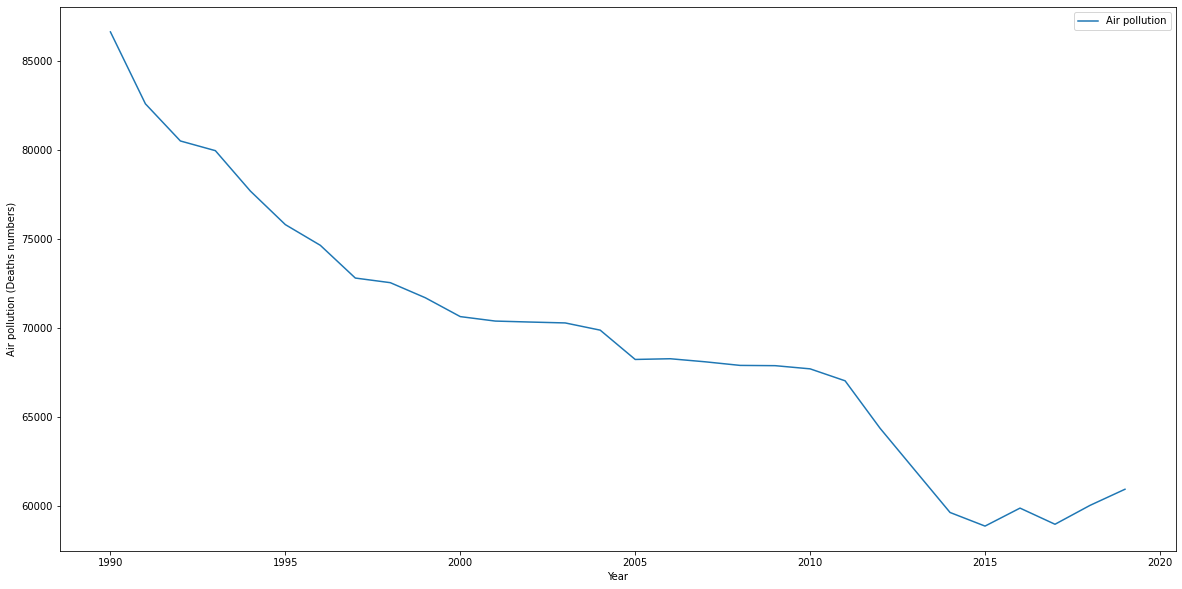

In [11]:
br.plot(ylabel = 'Air pollution (Deaths numbers)', figsize = (20,10))
plt.show()

# Processamento

In [12]:
reg = LinearRegression()

In [13]:
X_br = Brazil['Year'].values
Y_br = Brazil['Air pollution'].values

In [14]:
X_train_br, X_test_br, Y_train_br, Y_test_br = train_test_split(X_br, Y_br, test_size=0.3, shuffle=False) # separação dos dados de treino e teste

In [15]:
#Precisamos redimensionar os dados para fazer a regressão linear
X_train_br = X_train_br.reshape(-1,1)
Y_train_br = Y_train_br.reshape(-1,1)
X_test_br = X_test_br.reshape(-1,1)
Y_test_br = Y_test_br.reshape(-1,1)

In [16]:
#treinando o modelo
reg.fit(X_train_br, Y_train_br)
pred_br = reg.predict(X_test_br)

# Pós-processamento

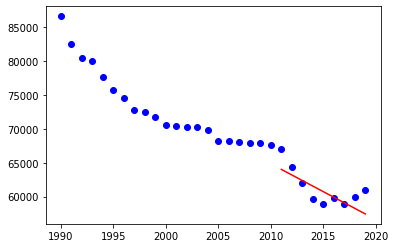

In [17]:
plt.scatter(X_br, Y_br, color='blue')
plt.plot(X_test_br, pred_br, color='red')

In [18]:
r_squared_br = r2_score(Y_test_br, pred_br)
print(f'Coeficiente r2: {r_squared_br}')

Coeficiente r2: 0.45751153758724705


# Previsão para um novo dado